# Pymaceuticals Inc.
---

### Analysis



Muliple conclusions can drawn based for various plots and statistics. 
1) The number of male and female mice studied are nearly equal, hence Sex is not a factor which can affect studies \
2) Timepoint or duration for which every drug regimen tested in does not have significant variation. 
\
3) Capomulin and Ramicane proved to be best drugs to treat cancer based on final tumor volume which can be proved using multiple other statistics and plots
\
4) The coirrelation between average tumor volume & mouse weight is linear and directly proportional to each otther
 

In [1]:
# Import required dependencies/packages

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Import CSV files
mouse_metadata_path  = "data/Mouse_metadata.csv"
study_results_path   = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata       = pd.read_csv(mouse_metadata_path)
study_results        = pd.read_csv(study_results_path)

# Combine the data into a single dataset 
combinedata          = pd.merge(study_results, mouse_metadata,  how="left", on=["Mouse ID"])

# Display the data table for preview
combinedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

micenumber = len(combinedata["Mouse ID"].unique())
print(micenumber)

249


249

In [3]:
combinedata_d1 = combinedata[combinedata.duplicated(["Mouse ID"], keep="first")] #keep first
combinedata_d2 = pd.concat([combinedata_d1, combinedata],ignore_index=True)      #add original to combinedata_d1
combinedata_d3 = combinedata_d2.drop_duplicates(subset=["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen", "Age_months"], keep='first')

In [4]:
# Priting dataframe with duplicated values

print(combinedata_d3)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        g989          0           45.000000                 0     Propriva   
1        a275          5           46.795257                 0     Ceftamin   
2        w575          5           48.913860                 1    Zoniferol   
3        x822          5           45.671104                 1     Ceftamin   
4        l509          5           45.851193                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1889     t565          0           45.000000                 0    Capomulin   
1890     i557          0           45.000000                 0    Capomulin   
1891     m957          0           45.000000                 0    Capomulin   
1892     f966          0           45.000000                 0    Capomulin   
1893     m601          0           45.000000                 0    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female

In [5]:
combinedata_d3.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,a275,5,46.795257,0,Ceftamin,Female,20,28
2,w575,5,48.913860,1,Zoniferol,Female,16,28
3,x822,5,45.671104,1,Ceftamin,Male,3,29
4,l509,5,45.851193,0,Capomulin,Male,17,21
5,n304,5,46.431216,0,Naftisol,Male,9,26
6,d164,5,46.617671,0,Zoniferol,Male,21,28
7,l897,5,45.462243,0,Capomulin,Male,17,19
8,l558,5,45.809089,0,Ceftamin,Female,13,30
9,g296,5,46.593233,0,Zoniferol,Female,14,29


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
combinedata1 = combinedata.drop_duplicates(subset=["Mouse ID"], keep='first')
print(combinedata1)
combinedata1.head()

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       b128          0                45.0                 0    Capomulin   
1       f932          0                45.0                 0     Ketapril   
2       g107          0                45.0                 0     Ketapril   
3       a457          0                45.0                 0     Ketapril   
4       c819          0                45.0                 0     Ketapril   
..       ...        ...                 ...               ...          ...   
245     t565          0                45.0                 0    Capomulin   
246     i557          0                45.0                 0    Capomulin   
247     m957          0                45.0                 0    Capomulin   
248     f966          0                45.0                 0    Capomulin   
249     m601          0                45.0                 0    Capomulin   

        Sex  Age_months  Weight (g)  
0    Female           9  

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
micenumber1 = len(combinedata1["Mouse ID"].unique())
print(micenumber1)

249


In [521]:
# Checking the number of mice in the clean DataFrame.

## Summary Statistics

In [8]:
grouped_lg_df = combinedata.groupby(["Drug Regimen"])
grouped_lg_df.count().head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [9]:
# Calculating for required columns

MeanTumorVolume     = grouped_lg_df["Tumor Volume (mm3)"].mean()
MedianTumorVolume   = grouped_lg_df["Tumor Volume (mm3)"].median()
VarianceTumorVolume = grouped_lg_df["Tumor Volume (mm3)"].var()
StdTumorVolume      = grouped_lg_df["Tumor Volume (mm3)"].std()
SemTumorVolume      = grouped_lg_df["Tumor Volume (mm3)"].sem()


set1 = pd.merge(MeanTumorVolume.rename('Mean Tumor Volume'), MedianTumorVolume.rename('Median Tumor Volume'), how="left", on=["Drug Regimen"])
set2 = pd.merge(VarianceTumorVolume.rename('Tumor Volume Variance'), StdTumorVolume.rename('Tumor Volume Std. Dev.'), how="left", on=["Drug Regimen"])
set3 = pd.merge(set1, set2, how="left", on=["Drug Regimen"])
set4 = pd.merge(set3, SemTumorVolume.rename('Tumor Volume Std. Err.'), how="left", on=["Drug Regimen"])

print(set4)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

set4.head(15)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

grouped_lg_df.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem' ]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# Calculating for required columns
import numpy as np

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64


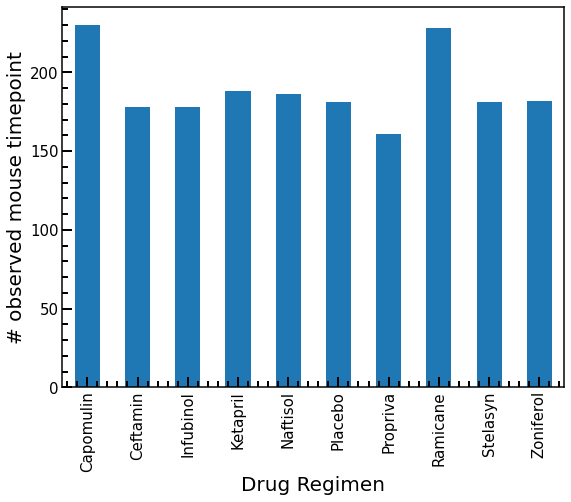

In [22]:
grouped_lg_df = combinedata.groupby(["Drug Regimen"])
numbers       = grouped_lg_df["Drug Regimen"].count()
print(numbers)

plt.figure(figsize=(9,7))

# Chart our data, give it a title, and label the axes
patron_chart = numbers.plot(kind="bar")
patron_chart.set_xlabel("Drug Regimen", fontsize=20)
patron_chart.set_ylabel("total number of rows (Mouse ID/Timepoints)", fontsize=20)

#
#plt.tight_layout()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.ylabel("# observed mouse timepoint", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50
#plt.savefig("Fig1.png")
plt.show()

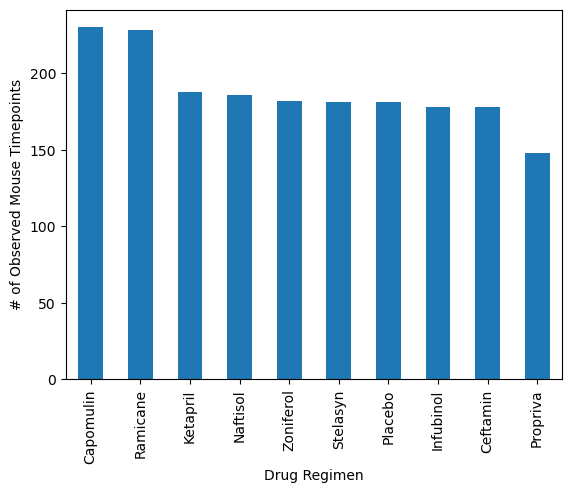

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


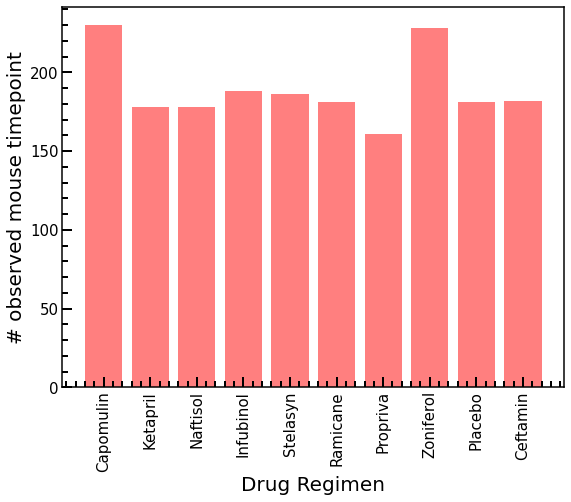

In [23]:
#mathpassing = school_data_complete.loc[school_data_complete["maths_score"] >= 50, ["maths_score"]]

combinedata6   = combinedata.drop_duplicates(subset=['Drug Regimen'], keep='first')
Regimen        = combinedata6["Drug Regimen"]
numberc        = grouped_lg_df["Mouse ID"].count()
#print(Regimen, numberc)

tick_locations = [value for value in Regimen]
#print(tick_locations)

plt.figure(figsize=(9,7))
plt.bar(Regimen, numberc, color='r', alpha=0.5, align="center")
plt.xticks()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.ylabel("# observed mouse timepoint", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50
#plt.savefig("Fig1.png")
plt.xticks(tick_locations, Regimen, rotation="vertical")
plt.show()


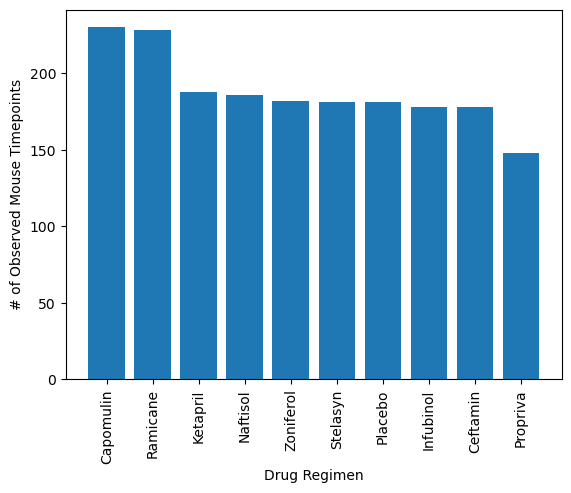

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


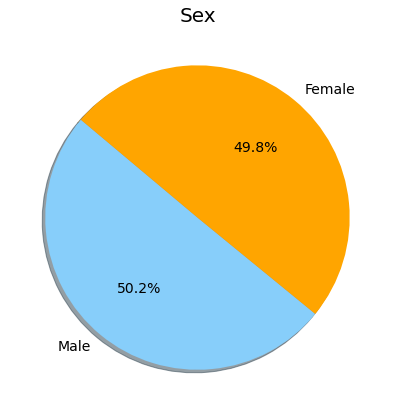

In [16]:
male    = combinedata1.loc[(combinedata1['Sex'] == 'Male'), 'Mouse ID']
female  = combinedata1.loc[(combinedata1['Sex'] == 'Female'), 'Mouse ID']

# Labels for the sections of our pie chart
labels  = ["Male", "Female"]

# The values of each section of the pie chart
sizes   = [len(male), len(female)]

# The colours of each section of the pie chart
colours = ["lightskyblue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,7))
plt.pie(sizes, labels=labels, colors=colours, autopct="%1.1f%%", shadow=True, startangle=140, textprops={'fontsize': 14})
plt.title("Sex", fontsize=20)
plt.show()

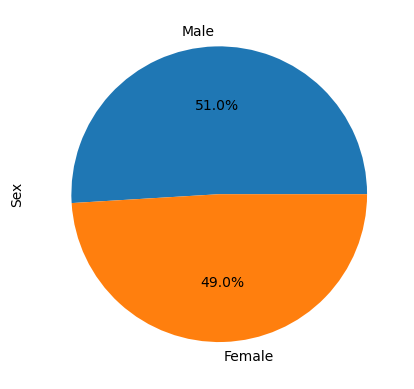

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


Sex
Female    935
Male      958
Name: Sex, dtype: int64


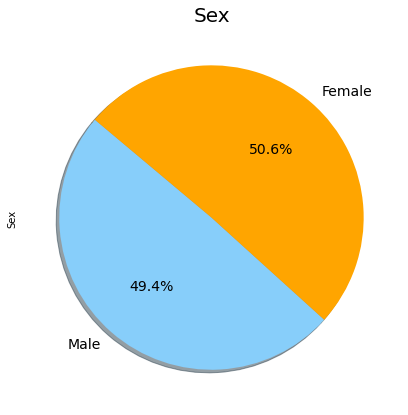

In [17]:
# Find out how many of each patron type borrowed library items
patron_borrows = grouped_lg_df["Mouse ID"].count()

combinedata8   = combinedata.groupby(["Sex"])
numbers        = combinedata8["Sex"].count()
print(numbers)

# Chart our data, give it a title, and label the axes
# Labels for the sections of our pie chart
labels  = ["Male", "Female"]

# The colours of each section of the pie chart
colours = ["lightskyblue", "orange"]

plt.figure(figsize=(9,7))
patron_chart = numbers.plot(kind="pie", labels=labels, colors=colours, autopct="%1.1f%%", shadow=True, startangle=140, textprops={'fontsize': 14})
plt.title("Sex", fontsize=20)
plt.show()

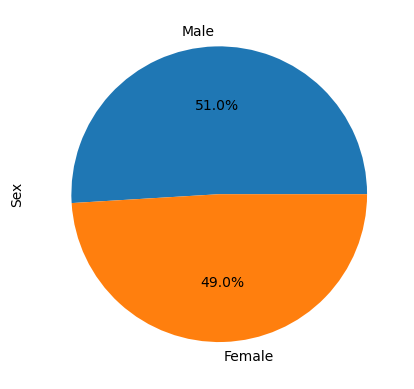

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [19]:
outliers1   = combinedata.sort_values(['Timepoint'])
outliers2 = outliers1.groupby(["Drug Regimen", "Mouse ID"]).agg({"Tumor Volume (mm3)":'sum', 'Timepoint':'max'})
outliers2.head(10)

Tumor Volume (mm3)  Timepoint
Drug Regimen Mouse ID                               
Capomulin    b128              419.636356         45
             b742              400.836993         45
             f966              182.529864         20
             g288              419.900966         45
             g316              446.133439         45
             i557              448.058097         45
             i738              391.410528         45
             j119              444.652363         45
             j246              345.735397         35
             l509              444.344738         45

In [20]:
outliers3 = pd.merge(combinedata, outliers2, how="left", on=["Mouse ID", "Drug Regimen", "Timepoint"])
outliers3.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)_y
0,b128,0,45.0,0,Capomulin,Female,9,22,NaN
1,f932,0,45.0,0,Ketapril,Male,15,29,45.0
2,g107,0,45.0,0,Ketapril,Female,2,29,NaN
3,a457,0,45.0,0,Ketapril,Female,11,30,NaN
4,c819,0,45.0,0,Ketapril,Male,21,25,NaN
5,h246,0,45.0,0,Ketapril,Male,13,30,NaN
6,p189,0,45.0,0,Ketapril,Male,8,28,NaN
7,n923,0,45.0,0,Ketapril,Male,19,30,NaN
8,q119,0,45.0,0,Ketapril,Male,17,30,NaN
9,f993,0,45.0,0,Naftisol,Male,21,28,NaN


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentslist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#print(treatmentslist)

# Create empty list to fill with tumor vol data (for plotting)
tumorvollist   = []
outlierlist    = []
treat = {}

for index, treatment in enumerate(treatmentslist):
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #print(treatment)
     
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers4      = outliers3[(outliers3["Drug Regimen"] == treatment) & (outliers3["Tumor Volume (mm3)_y"] >0)]
    #print(outlier4["Tumor Volume (mm3)_y"])
    
    # add subset 
    tumorvollist   = outliers4["Tumor Volume (mm3)_y"]
    treat[str(treatment)] = outliers4["Tumor Volume (mm3)_y"]
    #print(treat['list_'+str(treatment)])
    
    # Determine outliers using upper and lower bounds
    quartiles      = tumorvollist.quantile([.25,.5,.75])
    lowerq         = quartiles[0.25]
    upperq         = quartiles[0.75]
    iqr            = upperq-lowerq
    #print(lowerq, upperq, iqr)
    
    outlierlist   = outliers4.loc[(outliers4["Tumor Volume (mm3)_y"] > upperq) | (outliers4["Tumor Volume (mm3)_y"] < lowerq),"Tumor Volume (mm3)_y"]
    #print(outlierlist)
    print(f"{treatment}'s potential outliers: {(tumorvollist)}")   

Capomulin's potential outliers: 650     124.154476
801     183.195878
930     182.529864
1497    345.735397
1764    419.636356
1769    393.287251
1771    444.344738
1777    419.900966
1788    365.092120
1791    446.133439
1797    385.068292
1800    390.498164
1817    425.072610
1821    415.815951
1829    400.836993
1838    413.524523
1843    348.474699
1846    361.820396
1849    345.591434
1850    391.410528
1854    428.037330
1859    444.652363
1878    448.058097
1888    433.673645
1889    398.874952
Name: Tumor Volume (mm3)_y, dtype: float64
Ramicane's potential outliers: 424      88.166373
734     181.439088
1312    307.018436
1352    295.884374
1498    345.471885
1763    372.876512
1773    407.013854
1776    436.040104
1780    400.338403
1795    360.501562
1799    384.115100
1801    442.681269
1808    388.077946
1814    323.588589
1822    418.687691
1828    401.085775
1833    391.283327
1836    430.600524
1844    396.404430
1857    379.892187
1867    455.763948
1870    374.892366
1

In [530]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentslist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#print(treatmentslist)

# Create empty list to fill with tumor vol data (for plotting)
tumorvollist   = []
outlierlist    = []
treat = {}

for index, treatment in enumerate(treatmentslist):
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #print(treatment)
     
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers4      = outliers3[(outliers3["Drug Regimen"] == treatment) & (outliers3["Tumor Volume (mm3)_y"] >0)]
    #print(outlier4["Tumor Volume (mm3)_y"])
    
    # add subset 
    tumorvollist   = outliers4["Tumor Volume (mm3)_x"]
    treat[str(treatment)] = outliers4["Tumor Volume (mm3)_x"]
    #print(treat['list_'+str(treatment)])
    
    # Determine outliers using upper and lower bounds
    quartiles      = tumorvollist.quantile([.25,.5,.75])
    lowerq         = quartiles[0.25]
    upperq         = quartiles[0.75]
    iqr            = upperq-lowerq
    #print(lowerq, upperq, iqr)
    
    outlierlist   = outliers4.loc[(outliers4["Tumor Volume (mm3)_x"] > upperq) | (outliers4["Tumor Volume (mm3)_x"] < lowerq),"Tumor Volume (mm3)_x"]
    #print(outlierlist)
    print(f"{treatment}'s potential outliers: {(tumorvollist)}")   

Capomulin's potential outliers: 650     39.952347
801     46.539206
930     30.485985
1497    38.753265
1764    38.982878
1769    34.455298
1771    41.483008
1777    37.074024
1788    32.377357
1791    40.159220
1797    31.896238
1800    33.329098
1817    38.846876
1821    40.658124
1829    38.939633
1838    36.041047
1843    28.430964
1846    28.484033
1849    23.343598
1850    37.311846
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3)_x, dtype: float64
Ramicane's potential outliers: 424     43.166373
734     44.183451
1312    43.419381
1352    38.342008
1498    36.561652
1763    31.095335
1773    38.407618
1776    45.220869
1780    36.374510
1795    30.276232
1799    30.638696
1801    40.659006
1808    30.564625
1814    22.050126
1822    33.397653
1828    36.134852
1833    31.560470
1836    43.047543
1844    37.311236
1857    38.810366
1867    40.667713
1870    29.128472
1874    37.225650
1879    32.978522
1885    33.5

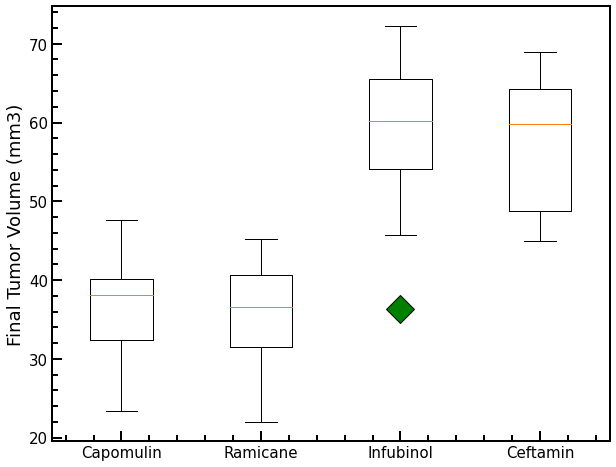

In [533]:
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = (10,8)
ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('2')
green_diamond = dict(markerfacecolor='g', marker='D', markersize=20)
plt.boxplot(treat.values(), flierprops=green_diamond)
ax1.set_xticklabels(treat.keys())
plt.ylabel("Final Tumor Volume (mm3)", fontsize=18)
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.savefig("Fig1.png")
plt.show()

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


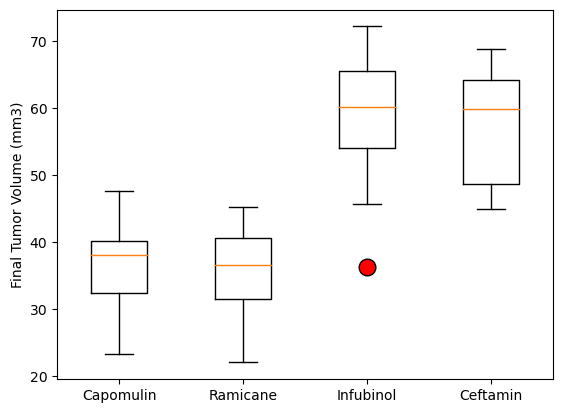

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [534]:
FirstID       = combinedata["Mouse ID"][0]
print(FirstID)

TumorVol      = np.array(combinedata.loc[ (combinedata["Drug Regimen"]== 'Capomulin')  & (combinedata["Mouse ID"]== FirstID), ["Tumor Volume (mm3)"]])
Timepoint     = np.array(combinedata.loc[ (combinedata["Drug Regimen"]== 'Capomulin')  & (combinedata["Mouse ID"]== FirstID), ["Timepoint"]])
print(TumorVol, Timepoint)
print(len(TumorVol), len(Timepoint))

b128
[[45.        ]
 [45.65133131]
 [43.2708519 ]
 [43.78489343]
 [42.731552  ]
 [43.26214483]
 [40.60533486]
 [37.96764437]
 [38.3797259 ]
 [38.98287774]] [[ 0]
 [ 5]
 [10]
 [15]
 [20]
 [25]
 [30]
 [35]
 [40]
 [45]]
10 10


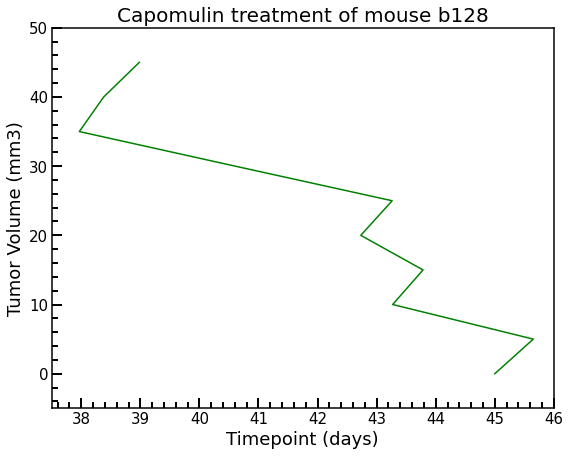

In [535]:
plt.figure(figsize=(9,7))
plt.plot(TumorVol, Timepoint, color="green")
plt.title("Capomulin treatment of mouse " + FirstID, fontsize=20)
plt.ylabel("Tumor Volume (mm3)", fontsize=18)
plt.xlabel("Timepoint (days)", fontsize=18)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
plt.ylim(-5,50)
plt.xlim(37.5,46)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50

#plt.savefig("Fig1.png")
plt.show()

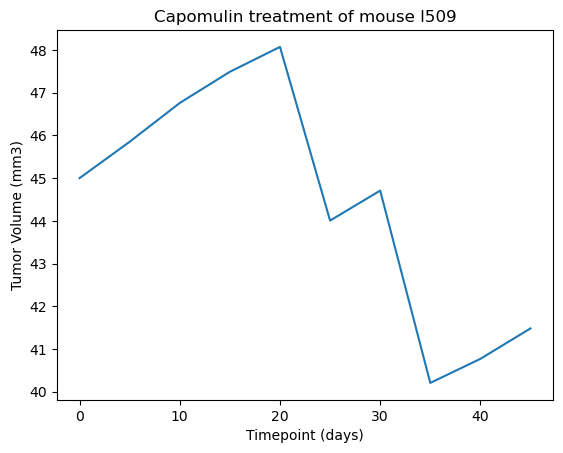

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [536]:
grouped_lg_df   = combinedata.groupby(["Drug Regimen"])
grouped_lg_df1  = grouped_lg_df.get_group('Capomulin')
grouped_lg_df2  = grouped_lg_df1.groupby(["Mouse ID"])
grouped_lg_df2.count().head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,10,10,10,10,10,10,10
b742,10,10,10,10,10,10,10
f966,5,5,5,5,5,5,5
g288,10,10,10,10,10,10,10
g316,10,10,10,10,10,10,10


In [537]:
AvgTumorVol = np.array(grouped_lg_df2["Tumor Volume (mm3)"].mean())
AvgWeight   = np.array(grouped_lg_df2["Weight (g)"].mean())
print(AvgTumorVol,AvgWeight)

[41.96363563 40.0836993  36.50597276 41.99009661 44.6133439  44.80580968
 39.14105275 44.46523635 43.21692461 44.43447379 42.50726103 34.8474699
 39.04981645 45.79896951 36.50921205 43.36736445 34.55914339 42.80373304
 39.3287251  39.88749519 41.5815951  41.38482521 41.35245228 36.18203956
 38.50682925] [22. 21. 17. 19. 22. 24. 20. 23. 21. 21. 19. 17. 19. 25. 17. 25. 17. 23.
 17. 17. 21. 23. 21. 15. 17.]


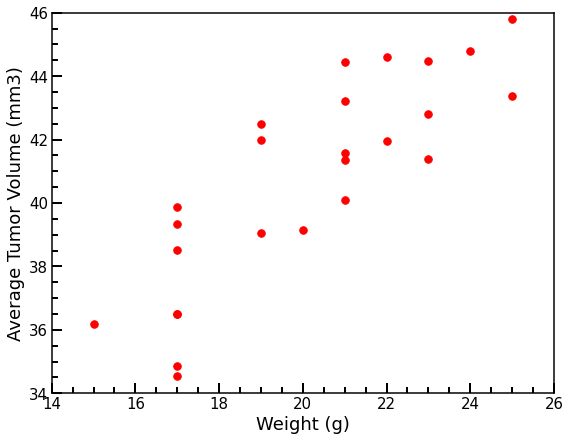

In [539]:
plt.figure(figsize=(9,7))
plt.plot(AvgWeight, AvgTumorVol, marker='.', markersize=15, color='r',linestyle='none')
plt.ylabel("Average Tumor Volume (mm3)", fontsize=18)
plt.xlabel("Weight (g)", fontsize=18)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
plt.ylim(34,46)
plt.xlim(14,26)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50

#plt.savefig("Fig1.png")
plt.show()

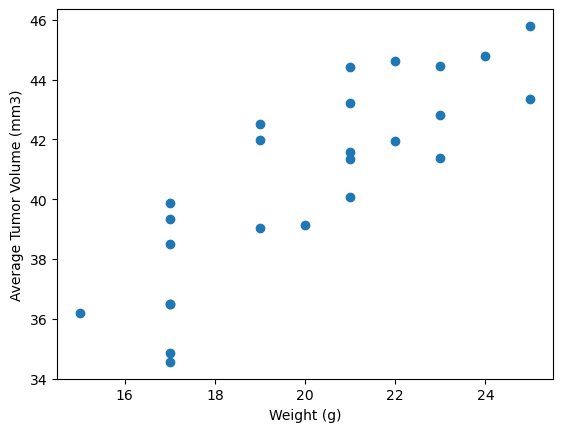

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [540]:
correlation = st.pearsonr(AvgWeight, AvgTumorVol)
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(AvgWeight, AvgTumorVol)[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


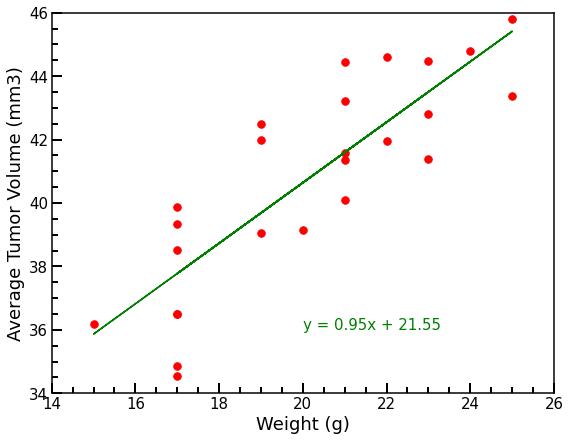

In [542]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(AvgWeight, AvgTumorVol)
regress_values = AvgWeight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(9,7))
plt.plot(AvgWeight, AvgTumorVol, marker='.', markersize=15, color='r',linestyle='none')
plt.plot(AvgWeight,regress_values,"g-")
plt.annotate(line_eq,(20,36),fontsize=15,color="g")

plt.ylabel("Average Tumor Volume (mm3)", fontsize=18)
plt.xlabel("Weight (g)", fontsize=18)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
plt.ylim(34,46)
plt.xlim(14,26)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50

#plt.savefig("Fig1.png")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


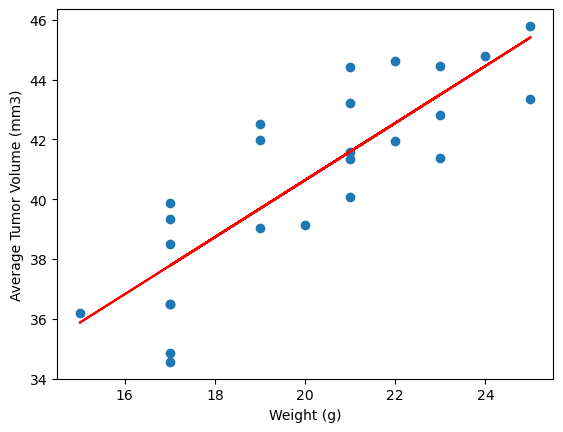

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
